In [2]:
import numpy as np
import pandas as pd

##### 설정변경코드
* 변수 명이 두 번 이상 출력되어도 모두 콘솔에서 보여줄 것
* 
from IPython.core.interactiveshell import InteractiveShell <br> 
InteractiveShell.ast_node_interactivity="all"
* InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
a=1
b=2
a
b

1

2

# pandas 데이터 구조 #1. Series

#### 학습내용
1. 시리즈 소개
2. 시리즈 생성
3. 시리즈 속성들
4. 시리즈 인덱싱
5. 시리즈 슬라이싱
6. 시리즈 연산
7. 시리즈 데이터의 갱신, 추가, 삭제
8. 시리즈 관련 함수들
9. 날짜 인덱스를 사용한 시리즈

## 1. Series 소개

- pandas의 기본 객체 중 하나
- numpy의 ndarray를 기반으로 **인덱싱 기능**을 추가하여 **1차원 배열**을 나타냄
- index를 지정하지 않으며 기본적으로 ndarray와 같이 0-based 인덱스 생성
- index를 지정할 경우 명시적으로 지정된 index를 사용
- 같은 타입의 0개 이상의 데이터를 가질 수 있음

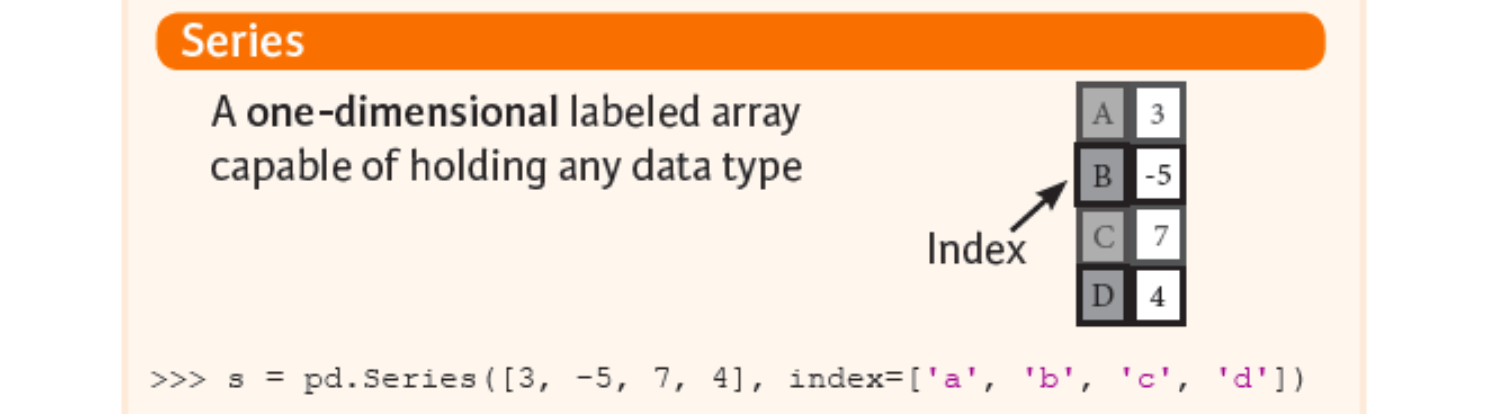

- 출처 : https://www.kdnuggets.com/2017/01/pandas-cheat-sheet.html

#### 시리즈의 자료구조
- 데이터가 순차적으로 나열된 1차원 배열 형태
- 인덱스(index)와 데이터 값(value)이 일대일로 대응
    - 딕셔너리와 비슷한 구조 : {key(index):value}

#### 시리즈의 인덱스
- 데이터 값의 위치를 나타내는 이름표 역할
- 데이터 값의 순서와 주소(위치)를 저장
- 데이터 값의 탐색, 정렬, 선택, 결합 등 데이터 조작을 쉽게 할 수 있음

#### 시리즈 생성 : 판다스 내장함수인 Series()이용
- 리스트, 딕셔너리, 튜플 등으로 시리즈 생성

## 2. Series 생성하기

**pd.Series(seq_data, index=None, dtype=None, name=None,...) 함수 이용**

- seq_data : array-like, Iterable, dict, or scalar value
- index : array-like or Index(1d)
- dtype : str, numpy.dtype, or ExtentionDtype
- name : str, optional (시리즈의 이름)

https://pandas.pydata.org/docs/reference/series.html

### 1) seq_data를 이용하여 Series 생성

- index를 지정하지 않아도 자동적으로 생성됨 : 0부터 숫자로 생성됨

#### ① 리스트로 시리즈 만들기

In [6]:
# 인덱스 없이 시리즈 생성 시 자동으로 정수(위치)인덱스 생성됨
s = pd.Series([10,20,30,40])
s

0    10
1    20
2    30
3    40
dtype: int64

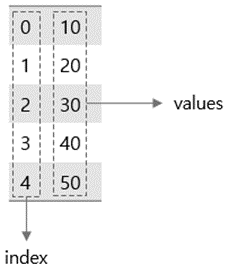

In [7]:
# 정수값을 갖은 리스트로 시리즈 생성
s1 = pd.Series([11,22,33,44])
s1

0    11
1    22
2    33
3    44
dtype: int64

In [8]:
# 문자열을 갖은 리스트로 시리즈 생성
s2 = pd.Series(['A', 'B', 'C'])
s2

0    A
1    B
2    C
dtype: object

In [10]:
s2 = pd.Series('A B C'.split())
s2

0    A
1    B
2    C
dtype: object

#### ② 정수 범위 자료를 시리즈로 생성
- range() / np.arange() 함수 사용

In [12]:
# range()함수를 이용하여 시리즈 생성
s = pd.Series(range(10,14))
s

0    10
1    11
2    12
3    13
dtype: int64

In [13]:
# numpy.arange() 함수를 이용하여 시리즈 생성
s = pd.Series(np.arange(10,14))
s

0    10
1    11
2    12
3    13
dtype: int64

#### ③ 결측값을 포함한 시리즈 생성
- 결측값 NaN : numpy 모듈 nan 사용
- 결측값 생성을 위해 numpy 모듈 임포트

In [14]:
s = pd.Series([1,2,3,np.nan,4,5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

#### ④ 딕셔너리로 시리즈 생성
- **Series({key1:value1, key2:value2, key3:value3, ... })**
    - 인덱스 -> key
    - 값 -> value

In [15]:
#key가 index가 됨
dic = {'홍길동':50, '강감찬':90, '이순신':100}
s = pd.Series(dic)
s

홍길동     50
강감찬     90
이순신    100
dtype: int64

### 2) 인덱스를 명시하여 시리즈 생성

**[형식]** pd.Series([값1, 값2, 값3, ... ], **`index=[1,2,3, ...]`**)

#### ① 숫자 인덱스 지정

- s = pd.Series([값1, 값2, 값3, ... ], **index=[1,2,3, ...]**)

In [17]:
# 숫자(정수, 위치) 인덱스 지정
s1 = pd.Series([10,20,30], index=[1,2,3])
s1

1    10
2    20
3    30
dtype: int64

#### ② 문자 인덱스 지정

In [18]:
# 문자 인덱스 지정
s2 = pd.Series([10,20,30], index=['Kim', 'Lee', 'Choi'])
s2

Kim     10
Lee     20
Choi    30
dtype: int64

#### ③ 딕셔너리 기반으로 생성한 시리즈 인덱스 설정

- 딕셔너리의 원소는 순서를 갖지 않는다.
    - 딕셔너리로 생성된 시리즈의 원소도 순서가 보장되지 않는다.
    - 만약 순서를 보장하고 싶으면 인덱스를 리스트로 지정해야 한다.

In [22]:
city = {'서울': 9900000, '부산': 3400000, '인천': 2700000, '대전':1500000}
city
s3 = pd.Series(city)
s3

{'서울': 990000, '부산': 340000, '인천': 2700000, '대전': 1500000}

서울     990000
부산     340000
인천    2700000
대전    1500000
dtype: int64

In [33]:
# 딕셔너리 기반으로 생성한 시리즈 인덱스 변경설정
s4 = pd.Series(s3.values, index=['Seoul', 'Busan', 'Incheon', 'Daejeon'])
s4

Seoul       990000
Busan       340000
Incheon    2700000
Daejeon    1500000
dtype: int64

-------

## 3. 시리즈의 속성들

### 1) 시리즈의 index

- 시리즈의 index는 index 속성으로 접근 : **시리즈.index**

In [25]:
# 시리즈객체.index
s1

1    10
2    20
3    30
dtype: int64

### s1.index

In [27]:
s1.index

Index([1, 2, 3], dtype='int64')

In [28]:
s3
s3.index

서울     990000
부산     340000
인천    2700000
대전    1500000
dtype: int64

Index(['서울', '부산', '인천', '대전'], dtype='object')

### 2) 시리즈.index.name 속성

- 시리즈의 인덱스에 이름을 붙일 수 있음

In [29]:
print(s1.index.name)

None


In [30]:
s3.index.name = '도시'
s3

도시
서울     990000
부산     340000
인천    2700000
대전    1500000
dtype: int64

### 3) 시리즈의 값(value)
- numpy 자료구조 : 1차원 배열 
- values 속성으로 접근 : **시리즈.values**

In [31]:
s1.values

array([10, 20, 30])

In [32]:
s3.values

array([ 990000,  340000, 2700000, 1500000])

### 4) 시리즈.name 속성
- 시리즈 데이터에 이름을 붙일 수 있음
- name 속성은 값의 의미 전달에 사용

In [35]:
s1
s1.name

1    10
2    20
3    30
dtype: int64

In [36]:
s3
s3.name

도시
서울     990000
부산     340000
인천    2700000
대전    1500000
dtype: int64

In [37]:
s3.name = '인구수'
s3

도시
서울     990000
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

## 4. 시리즈 인덱싱(indexing)

#### 시리즈의 인덱싱 종류

- 정수형 위치 인덱스(integer position)
    - RangeIndex 객체
    
    
- 인덱스 이름(index name) 또는  인덱스 라벨(index label)

#### <인덱스 구조>

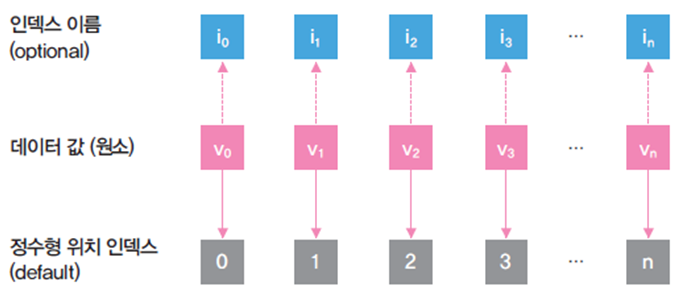

※인덱스를 지정하지 않으면 0부터 시작하는 정수형 인덱스가 지정됨

### 1) 원소 접근
- 정수형 위치인덱스 : 객체명[정수인덱스]
    - 예. s[0]


- 문자형 인덱스 : 객체명['문자인덱스'] 또는 객체명.문자인덱스명
    - 예. s['인천'],  s.인천

#### ① 정수형 위치인덱스 접근

In [38]:
s1

1    10
2    20
3    30
dtype: int64

In [40]:
s1[1]

10

In [41]:
s1.index

Index([1, 2, 3], dtype='int64')

In [42]:
s3

도시
서울     990000
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

In [43]:
s3.index

Index(['서울', '부산', '인천', '대전'], dtype='object', name='도시')

#### ② 문자형 인덱스 접근

In [49]:
s3['서울']
s3.서울
s3.iloc[0]

990000

990000

990000

In [51]:
# 문제. s3 시리즈에서 부산의 값을 가져오기
s3.부산
s3['부산']

340000

340000

### 2) 리스트 이용 인덱싱
- 자료의 순서를 바꾸거나 특정자료 여러 개를 선택할 수 있다.
- 인덱스값 여러 개를 이용해 접근시 [ ]안에 넣는다

In [56]:
# 여러 개 접근
# [정수인덱스1,정수인덱스2,...]
s1
s1[[1,2]]
#s1[1,2]하면 에러남 두개 이상 접근시 대괄호 2개

1    10
2    20
3    30
dtype: int64

1    10
2    20
dtype: int64

In [58]:
# [문자인덱스1, 문자인데스2,...]
s2
s2[['Kim', 'Choi']]

Kim     10
Lee     20
Choi    30
dtype: int64

Kim     10
Choi    30
dtype: int64

### 3) 인덱스 통한 시리즈 데이터 변경

In [59]:
s3

도시
서울     990000
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

In [61]:
# '서울' 데이터 변경
s3['서울'] = 1000000 #s3.서울 = 1000000
s3

도시
서울    1000000
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

### 4) 인덱스 재사용

In [62]:
s3.index

Index(['서울', '부산', '인천', '대전'], dtype='object', name='도시')

In [63]:
s5 = pd.Series([11320036, 3567382, 2801394, 1568990], index=s3.index)
s5

도시
서울    11320036
부산     3567382
인천     2801394
대전     1568990
dtype: int64

## 5. 시리즈 슬라이싱(slicing)

- 정수형 위치 인덱스를 사용한 슬라이싱
    - 시리즈[start : stop+1]


- 문자(라벨)인덱스 이용 슬라이싱
    - 시리즈['시작라벨' : '끝라벨']  : 표시된 라벨 범위 모두 추출

In [65]:
# 정수형 위치인덱스를 사용하여 슬라이싱
s = pd.Series([100,200,300,400,500])
s
s[1:3]

0    100
1    200
2    300
3    400
4    500
dtype: int64

1    200
2    300
dtype: int64

In [67]:
# 문자열인덱스를 사용하여 슬라이싱
s3
s3['부산':'대전'] #문자열 인덱스에서는 마지막 값 포함함

도시
서울    1000000
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

도시
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

## 6. 시리즈 연산

### 1) 벡터화 연산
- numpy 배열처럼 pandas의 시리즈도 벡터화 연산 가능 
- 벡터화 연산이란 집합적 자료형의 원소 각각을 독립적으로 계산을 진행하는 방법
    - 단, 연산은 시리즈의 값에만 적용되며 인덱스 값은 변경 불가
    
#### 시리즈와 숫자(스칼라) 연산 : Series객체 + 연산자(+, \*, -, / ) + 숫자

In [69]:
# 시리즈와 스칼라의 합
s
s + 10

0    100
1    200
2    300
3    400
4    500
dtype: int64

0    110
1    210
2    310
3    410
4    510
dtype: int64

In [70]:
s3

도시
서울    1000000
부산     340000
인천    2700000
대전    1500000
Name: 인구수, dtype: int64

In [72]:
# 시리즈의 값을 1/1000000로 변경
s3 / 1000000

도시
서울    1.00
부산    0.34
인천    2.70
대전    1.50
Name: 인구수, dtype: float64

### 2) 벡터화 인덱싱(Boolean selection)
- boolean Series가 []와 함께 사용되면 True 값에 해당하는 값만 새로 반환되는 Series객체에 포함됨
- 다중조건의 경우, &(and), |(or)를 사용하여 연결 가능

In [75]:
s5

도시
서울    11320036
부산     3567382
인천     2801394
대전     1568990
dtype: int64

In [77]:
(s5 >= 2500000) & (s5 <= 5000000)

도시
서울    False
부산     True
인천     True
대전    False
dtype: bool

In [78]:
s5[(s5 >= 2500000) & (s5 <= 5000000)]

도시
부산    3567382
인천    2801394
dtype: int64

In [80]:
s5[(s5 >= 2500000) & (s5 <= 5000000)].index

Index(['부산', '인천'], dtype='object', name='도시')

In [82]:
list(s5[(s5 >= 2500000) & (s5 <= 5000000)].index)

['부산', '인천']

In [83]:
s6 = pd.Series(np.arange(1,21))
s6

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [84]:
# 값이 5보다 큰 요소 추출
s6[s6 > 5]

5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [86]:
# 짝수 추출
s6[s6%2==0]

1      2
3      4
5      6
7      8
9     10
11    12
13    14
15    16
17    18
19    20
dtype: int64

In [87]:
# 인덱스가 5이상인 요소들 추출
s6[s6.index >= 5]

5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
dtype: int64

In [88]:
# 값이 5이상 8이하인 요소 추출
s6[(s6 >=5) & (s6 <=8)]

4    5
5    6
6    7
7    8
dtype: int64

In [89]:
# 값이 7이상인 수들의 합
np.sum(s6[s6>=7])

189

In [90]:
# 값이 7이상인 수들의 평균
np.mean(s6[s6 >=7])

13.5

In [91]:
# 값이 7이상인 수들의 개수
s6[s6>=7].count()

14

### 3) 두 시리즈 간의 연산

#### 시리즈와 시리즈 연산 : Series1 + 연산자(+, \*, -, /) +Series2

- 시리즈간의 연산은 **같은 인덱스**를 찾아 연산을 진행
- 동일한 인덱스는 연산을 진행하고 나머지 인덱스는 연산처리가 불가 해 NaN 값 처리

In [3]:
s1 = pd.Series([1,2,3,4], index='a b c d'.split())
s1

a    1
b    2
c    3
d    4
dtype: int64

In [5]:
s2 = pd.Series([5,6,7,8], index = 'b c d a'.split())
s2

b    5
c    6
d    7
a    8
dtype: int64

#### ① 시리즈 + 시리즈
- **같은 인덱스를 찾아 + 연산을 진행**

In [7]:
# 두 시리즈에 대한 + 연산 : 같은 인덱스를 기준으로 + 연산 수행
s1 + s2

a     9
b     7
c     9
d    11
dtype: int64

- **동일한 인덱스가 없는 경우 나머지 인덱스는 연산처리가 불가하여 NaN으로 처리**

In [9]:
s3 = pd.Series([10,11,12,13], index='e d f g'.split())
s4 = pd.Series([10,20,30,40], index='a b h i'.split())
s3
s4

e    10
d    11
f    12
g    13
dtype: int64

a    10
b    20
h    30
i    40
dtype: int64

In [10]:
s1 + s3 #d만 공통으로 갖고있음

a     NaN
b     NaN
c     NaN
d    15.0
e     NaN
f     NaN
g     NaN
dtype: float64

In [11]:
s1 + s4 #없으면 NaN으로 나옴

a    11.0
b    22.0
c     NaN
d     NaN
h     NaN
i     NaN
dtype: float64

In [12]:
s5 = pd.Series([-10, 50, np.nan, 100])
s5

0    -10.0
1     50.0
2      NaN
3    100.0
dtype: float64

In [14]:
s5.index='a b c d'.split()
s5

a    -10.0
b     50.0
c      NaN
d    100.0
dtype: float64

In [15]:
s1 + s5

a     -9.0
b     52.0
c      NaN
d    104.0
dtype: float64

#### ② 시리즈 - 시리즈

In [16]:
s1 - s2

a   -7
b   -3
c   -3
d   -3
dtype: int64

In [18]:
s1 - s4

a    -9.0
b   -18.0
c     NaN
d     NaN
h     NaN
i     NaN
dtype: float64

In [19]:
# 참고. >, >=, <, <=
s1 > s5
#인덱스의 순서가 동일해야 오류 없이 결과가 나옴 

a     True
b    False
c    False
d    False
dtype: bool

#### ③ 시리즈의 values 속성을 이용한 연산
- values 속성을 사용하면 시리즈의 형태가 사라지므로 동일 위치 원소들끼리 연산
- 시리즈.values 는 array 형태 반환

In [20]:
# 시리즈의 values속성은 ndarray 형태로 가져옴
s1
s1.values
s2
s2.values

a    1
b    2
c    3
d    4
dtype: int64

array([1, 2, 3, 4])

b    5
c    6
d    7
a    8
dtype: int64

array([5, 6, 7, 8])

In [21]:
# 시리즈의 요소간에 - 연산 수행 : 인덱스 무시
s1.values - s2.values

array([-4, -4, -4, -4])

### 4) 시리즈 산술연산 메서드

- Series1.add(Series2)
- Series1.sub(Series2)
- Series1.mul(Series2)
- Series1.div(Series2)

In [22]:
s1.add(s2)

a     9
b     7
c     9
d    11
dtype: int64

In [23]:
s1.sub(s2)

a   -7
b   -3
c   -3
d   -3
dtype: int64

In [24]:
s1.mul(s2)

a     8
b    10
c    18
d    28
dtype: int64

In [25]:
s1.div(s2)

a    0.125000
b    0.400000
c    0.500000
d    0.571429
dtype: float64

### 5) in 연산자

- 시리즈 객체는 라벨(문자)에 의해 인덱싱이 가능
- 실질적으로는 라벨을 key로 가지는 딕셔너리 형과 같다고 볼 수 있음
- 딕셔너리에서 제공하는 대부분의 연산자 사용 가능
    - in 연산자 : True / False
    - for 루프를 통해 각 원소의 key와 value에 접근

In [26]:
city = {'서울':9631482, '부산':3393191, '인천':2632035, '대전':1490158}
s = pd.Series(city)
s

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [27]:
# 인덱스가 '서울'인 요소가 시리즈에 있는지?
'서울' in s

True

In [28]:
# 인덱스가 '대전'인 요소가 시리즈에 있는가?
'대전' in s

True

In [29]:
# 인덱스가 '대구'인 요소가 시리즈에 있는가?
'대구' in s

False

In [31]:
# 인덱스가 '인천'인 요소가 시리즈에 없는가?
'인천' not in s

False

In [32]:
# 딕셔너리의 items()와 같은 함수를 시리즈에서도 제공 : 키와 값
s.items()

In [33]:
# items()는 리스트로 변환하여 사용
list(s.items())

[('서울', 9631482), ('부산', 3393191), ('인천', 2632035), ('대전', 1490158)]

In [34]:
# 시리즈의 각 요소의 인덱스와 값을 출력
for k, v in s.items():
    print(f'{k}:{v}')

서울:9631482
부산:3393191
인천:2632035
대전:1490158


## 7. 시리즈 데이터의 갱신, 추가, 삭제

**인덱싱을 이용하면 딕셔너리 처럼 갱신, 추가 가능**

In [35]:
s

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

### 1) 시리즈 데이터 갱신

In [37]:
s['부산'] = 3500000
s

서울    9631482
부산    3500000
인천    2632035
대전    1490158
dtype: int64

In [38]:
s.부산 = 3600000
s

서울    9631482
부산    3600000
인천    2632035
대전    1490158
dtype: int64

### 2) 시리즈 데이터 삭제

In [39]:
# 딕셔너리에서 요소 삭제를 위해 사용한 del 사용
del s['부산']  #del s.부산
s

서울    9631482
인천    2632035
대전    1490158
dtype: int64

### 3) 시리즈 데이터 추가

In [40]:
# 시리즈에 새로운 값 추가 : 딕셔너리의 방식과 동일
s['부산'] = 3600000
s

서울    9631482
인천    2632035
대전    1490158
부산    3600000
dtype: int64

In [41]:
s['대구']= 1875000
s

서울    9631482
인천    2632035
대전    1490158
부산    3600000
대구    1875000
dtype: int64

## 8. Series 관련 함수들

**Series size, shape, unique, count, value_counts 함수**
 - size : 시리즈 원소 개수 반환
 - shape : 튜플형태로 shape 반환
 - unique(): 유일한 값만 ndarray로 반환
 - count() : NaN을 제외한 개수를 반환
 - mean() : NaN을 제외한 평균 
 - value_counts() : NaN을 제외하고 각 값들의 빈도를 반환 

In [43]:
s = pd.Series([1,1,1,2,1,2,2,1,1,3,5,2,4,3,np.nan,5,3,2,1])
s

0     1.0
1     1.0
2     1.0
3     2.0
4     1.0
5     2.0
6     2.0
7     1.0
8     1.0
9     3.0
10    5.0
11    2.0
12    4.0
13    3.0
14    NaN
15    5.0
16    3.0
17    2.0
18    1.0
dtype: float64

### 1) 시리즈 원소 크기

In [46]:
len(s)
type(s)

19

pandas.core.series.Series

In [47]:
s.size

19

In [48]:
s.shape

(19,)

### 2) unique() : 시리즈의 유일한 값 반환

In [49]:
set(s)

{1.0, 2.0, 3.0, 4.0, 5.0, nan}

In [51]:
#위 set과 동일하게 사용가능
s.unique()

array([ 1.,  2.,  3.,  5.,  4., nan])

### 3) count() : NaN을 제외한 개수를 반환

In [52]:
s.count()

18

### 4) mean() : 데이터의 평균

In [53]:
s.mean() #NaN 제외하고 계산해줌

2.2222222222222223

In [54]:
np.nanmean(np.array([2,3,1,4,2,np.nan])) #NaN 포함하고 계산하고 싶으면

2.4

### 5) value_counts() : 그룹핑된 원소별 개수 

In [55]:
s.value_counts() #빈도

1.0    7
2.0    5
3.0    3
5.0    2
4.0    1
Name: count, dtype: int64

--------------------------------------------------------

## 참고. 날짜 인덱스 생성

In [56]:
index_date = ['2021-10-07', '2021-10-08', '2021-10-09', '2021-10-10']
s = pd.Series([200, 195, np.nan, 205], index=index_date)
s

2021-10-07    200.0
2021-10-08    195.0
2021-10-09      NaN
2021-10-10    205.0
dtype: float64

### 날짜 생성 함수 : date_range()

- 판다스 패키지의 date_range 함수 (날짜생성)
- pd.date_range(start=None, end=None, periods=None, freq='D')
    - start : 시작날짜
    - end : 끝날짜
    - periods : 날짜 생성기간
    - freq : 날짜 생성 주기, 기본값은 'D' (Day)
    - start는 필수 옵션/end나 periods는 둘 중 하나가 있어야 함

**freq 옵션**

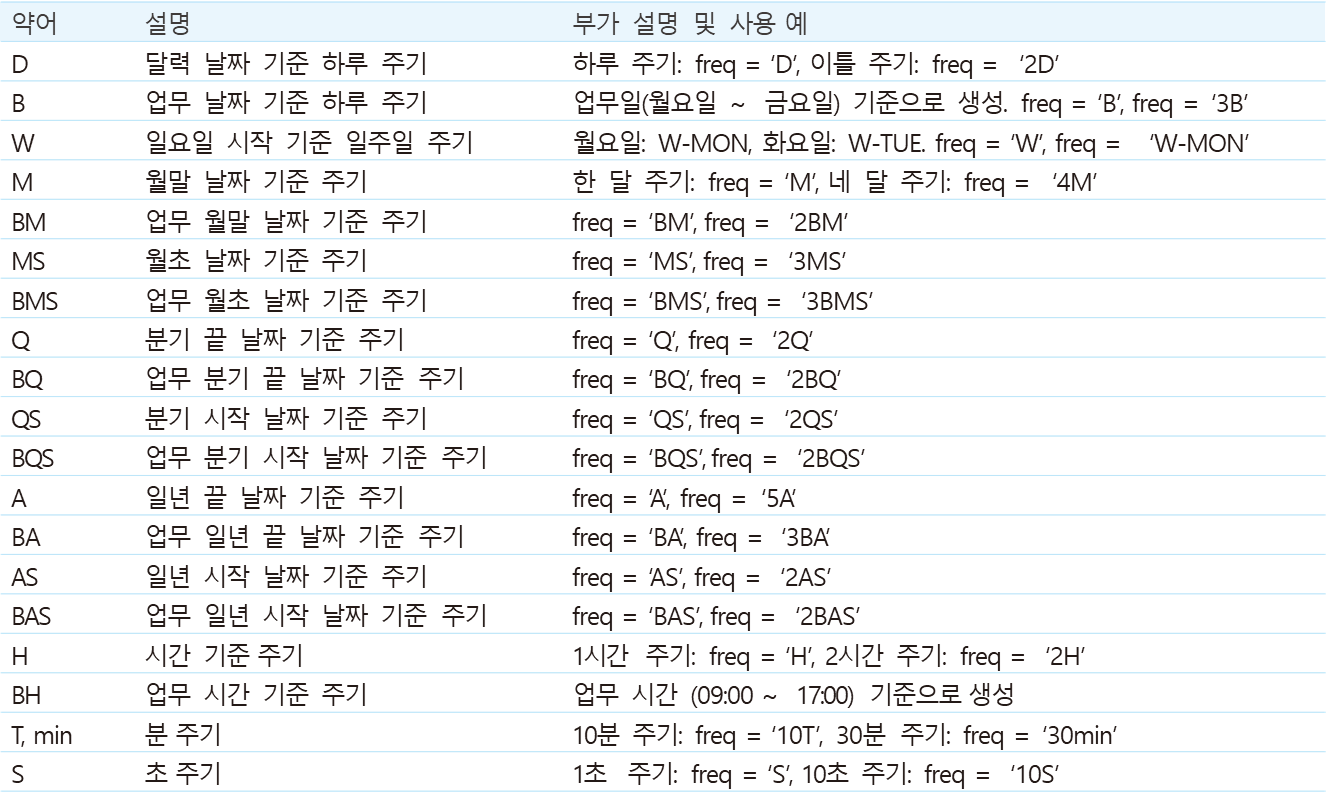

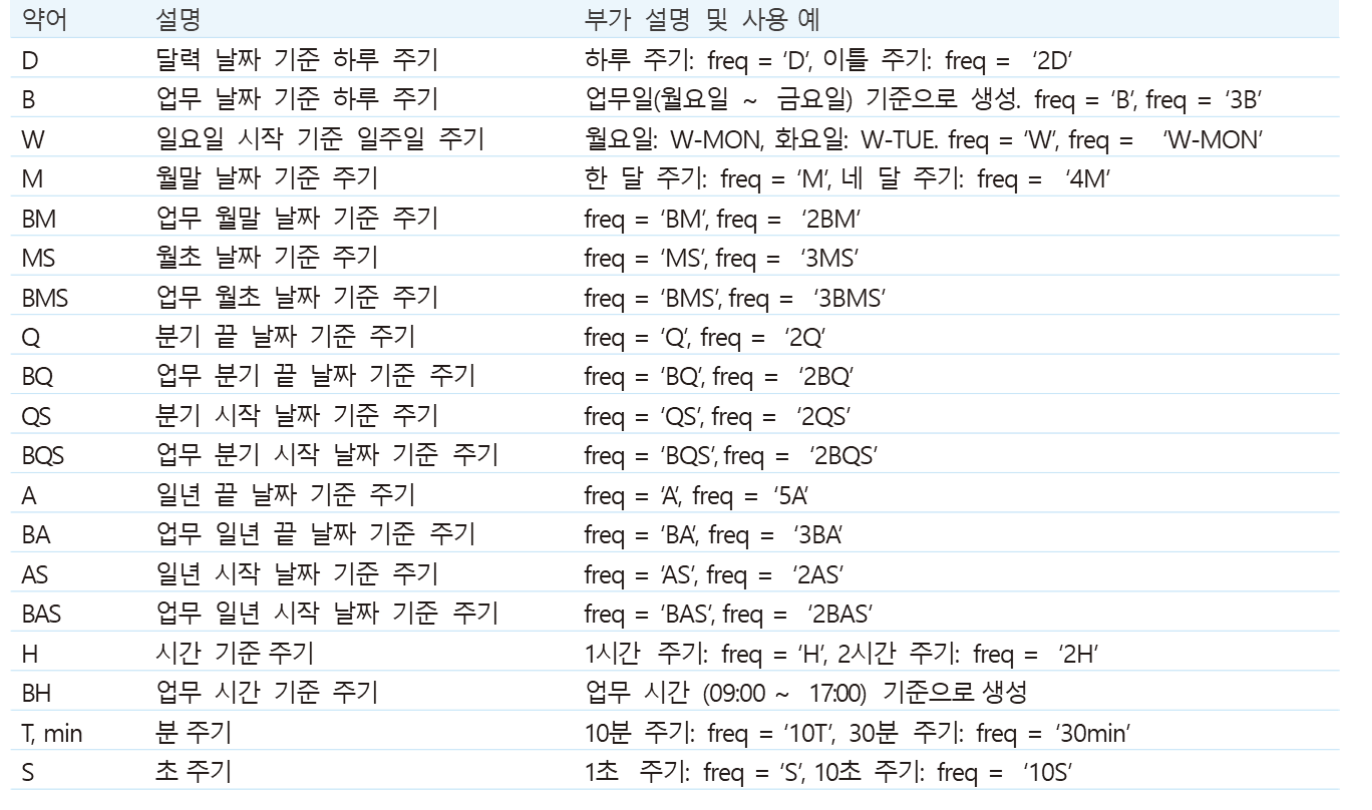

### 일별 간격으로 날짜 생성

In [58]:
date = pd.date_range(start='2021-10-01', end='2021-10-30')
date
type(date)

DatetimeIndex(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
               '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
               '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
               '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
               '2021-10-29', '2021-10-30'],
              dtype='datetime64[ns]', freq='D')

pandas.core.indexes.datetimes.DatetimeIndex

### 주간격으로 날짜 생성
- 지정한 일자가 포함된 주의 요일 시작 일자 기준으로 일주일 주기로 생성
- freq='W' : 일요일 기준으로 일주일 주기로 생성
- freq='W-MON' : 월요일 기준으로 일주일 주기로 생성

In [60]:
pd.date_range(start='2021-10-01', end='2021-10-30', freq='W') #일요일 단위

DatetimeIndex(['2021-10-03', '2021-10-10', '2021-10-17', '2021-10-24'], dtype='datetime64[ns]', freq='W-SUN')

In [61]:
pd.date_range(start='2021-10-01', end='2021-10-30', freq='W-TUE') #화요일 단위

DatetimeIndex(['2021-10-05', '2021-10-12', '2021-10-19', '2021-10-26'], dtype='datetime64[ns]', freq='W-TUE')

In [62]:
pd.date_range(start='2021-10-01', end='2021-10-30', freq='W-MON') #월요일 단위

DatetimeIndex(['2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25'], dtype='datetime64[ns]', freq='W-MON')

In [63]:
pd.date_range(start='2021-10-01', periods=4, freq='W-MON') #월요일 단위, 4개 추출

DatetimeIndex(['2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25'], dtype='datetime64[ns]', freq='W-MON')

### 월간격으로 날짜 생성
- freq='M' : 월말 날짜 기준 주기
- freq='BM' : 업무 월말 날짜 기준 주기
- freq='MS' : 월초 날짜 기준 주기

In [64]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='M') #월

DatetimeIndex(['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30',
               '2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31'],
              dtype='datetime64[ns]', freq='M')

In [65]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='MS') #월초

DatetimeIndex(['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [66]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='BM') #business

DatetimeIndex(['2021-10-29', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31', '2022-04-29', '2022-05-31',
               '2022-06-30', '2022-07-29', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30', '2022-12-30', '2023-01-31',
               '2023-02-28', '2023-03-31', '2023-04-28', '2023-05-31',
               '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-29',
               '2023-10-31', '2023-11-30', '2023-12-29', '2024-01-31',
               '2024-02-29', '2024-03-29', '2024-04-30', '2024-05-31',
               '2024-06-28', '2024-07-31', '2024-08-30', '2024-09-30',
               '2024-10-31'],
              dtype='datetime64[ns]', freq='BM')

In [67]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='BMS') #공휴일 제외

DatetimeIndex(['2021-10-01', '2021-11-01', '2021-12-01', '2022-01-03',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-02',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-03', '2022-11-01', '2022-12-01', '2023-01-02',
               '2023-02-01', '2023-03-01', '2023-04-03', '2023-05-01',
               '2023-06-01', '2023-07-03', '2023-08-01', '2023-09-01',
               '2023-10-02', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-03', '2024-07-01', '2024-08-01', '2024-09-02',
               '2024-10-01'],
              dtype='datetime64[ns]', freq='BMS')

### 분기별 주기로 날짜 생성
- freq = Q : 분기 끝 날짜 기준 주기
- freq = BQ : 업무 분기 끝 날짜 기준 주기
- freq = QS : 분기 시작 날짜 기준 주기

In [68]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='Q') #Quarterly

DatetimeIndex(['2021-12-31', '2022-03-31', '2022-06-30', '2022-09-30',
               '2022-12-31', '2023-03-31', '2023-06-30', '2023-09-30',
               '2023-12-31', '2024-03-31', '2024-06-30', '2024-09-30'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [69]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='QS') 

DatetimeIndex(['2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01',
               '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01',
               '2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01',
               '2024-10-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [70]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='BQ') 

DatetimeIndex(['2021-12-31', '2022-03-31', '2022-06-30', '2022-09-30',
               '2022-12-30', '2023-03-31', '2023-06-30', '2023-09-29',
               '2023-12-29', '2024-03-29', '2024-06-28', '2024-09-30'],
              dtype='datetime64[ns]', freq='BQ-DEC')

In [71]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='BQS') 

DatetimeIndex(['2021-10-01', '2022-01-03', '2022-04-01', '2022-07-01',
               '2022-10-03', '2023-01-02', '2023-04-03', '2023-07-03',
               '2023-10-02', '2024-01-01', '2024-04-01', '2024-07-01',
               '2024-10-01'],
              dtype='datetime64[ns]', freq='BQS-JAN')

### 연별 주기로 날짜 생성
- freq = A : 일년 끝 날짜 기준 주기
- freq = BA : 업무 일년 끝 날짜 기준 주기
- freq = AS : 일년 시작 날짜 기준 주기

In [73]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='A') #Annual

DatetimeIndex(['2021-12-31', '2022-12-31', '2023-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [74]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='AS') #연초

DatetimeIndex(['2022-01-01', '2023-01-01', '2024-01-01'], dtype='datetime64[ns]', freq='AS-JAN')

In [75]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='BAS') #Business

DatetimeIndex(['2022-01-03', '2023-01-02', '2024-01-01'], dtype='datetime64[ns]', freq='BAS-JAN')

In [76]:
pd.date_range(start='2021-10-01', end='2024-10-31', freq='BA') 

DatetimeIndex(['2021-12-31', '2022-12-30', '2023-12-29'], dtype='datetime64[ns]', freq='BA-DEC')

### 시간 기준 주기로 날짜와 시간 생성
- freq = H : 시간 주기
- freq = BH : 업무 시간 주기
- freq = T 또는 min : 분 주기
- freq = S : 초 주기

In [80]:
pd.date_range(start='2024-03-01 09:00:00', periods=10, freq='H') 

DatetimeIndex(['2024-03-01 09:00:00', '2024-03-01 10:00:00',
               '2024-03-01 11:00:00', '2024-03-01 12:00:00',
               '2024-03-01 13:00:00', '2024-03-01 14:00:00',
               '2024-03-01 15:00:00', '2024-03-01 16:00:00',
               '2024-03-01 17:00:00', '2024-03-01 18:00:00'],
              dtype='datetime64[ns]', freq='H')

In [79]:
pd.date_range(start='2024-03-01 00:00:00', periods=10, freq='BH') 

DatetimeIndex(['2024-03-01 09:00:00', '2024-03-01 10:00:00',
               '2024-03-01 11:00:00', '2024-03-01 12:00:00',
               '2024-03-01 13:00:00', '2024-03-01 14:00:00',
               '2024-03-01 15:00:00', '2024-03-01 16:00:00',
               '2024-03-04 09:00:00', '2024-03-04 10:00:00'],
              dtype='datetime64[ns]', freq='BH')

In [78]:
pd.date_range(start='2024-03-01 00:00:00', periods=10, freq='S') #seconds

DatetimeIndex(['2024-03-01 00:00:00', '2024-03-01 00:00:01',
               '2024-03-01 00:00:02', '2024-03-01 00:00:03',
               '2024-03-01 00:00:04', '2024-03-01 00:00:05',
               '2024-03-01 00:00:06', '2024-03-01 00:00:07',
               '2024-03-01 00:00:08', '2024-03-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

------------------------------------------------